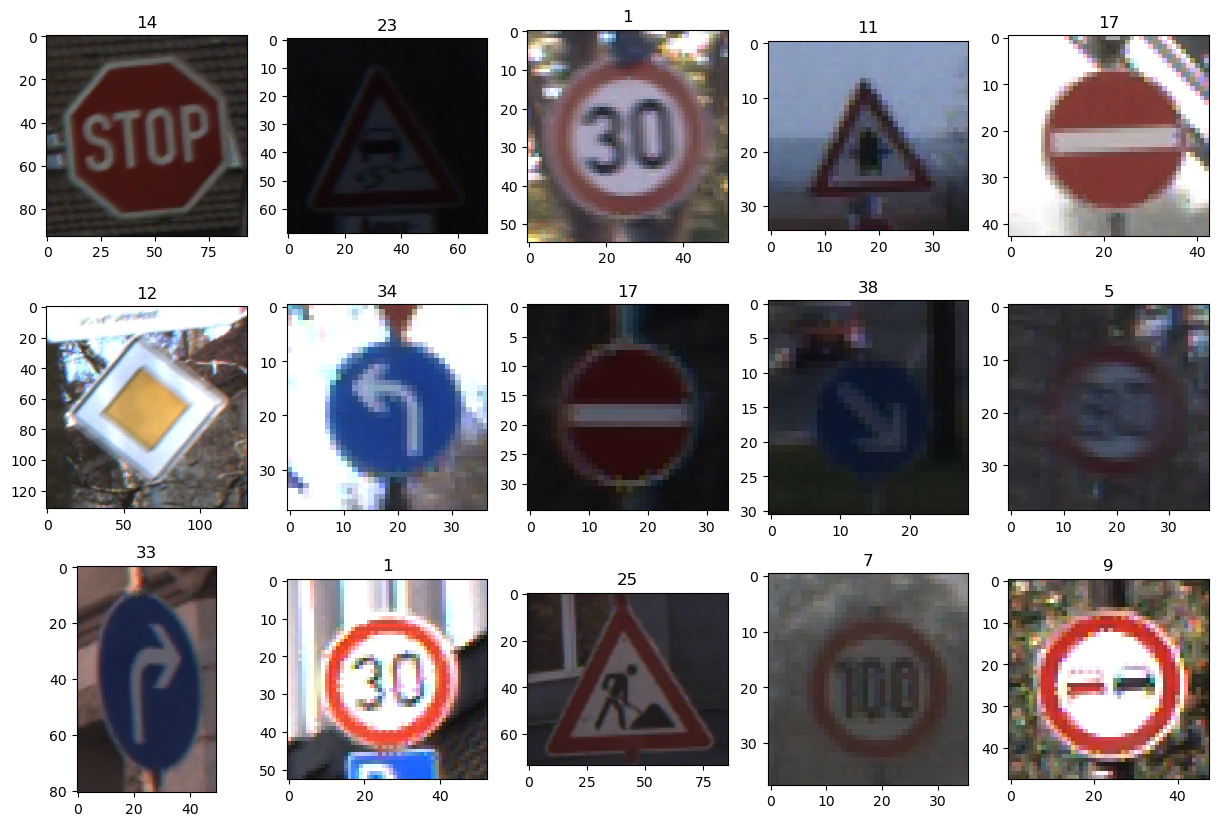

In [22]:
import os
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15, 10]

# Path to the dataset
root = 'C:/Users/user/Documents/GitHub/robotdreams_homework/homework_13/archive' 

# Load the training labels
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples
num_samples = len(data)

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img_path = os.path.join(root, data.iloc[idx]['Path'])
    img = cv2.imread(img_path)
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3, 5, ii + 1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])
plt.show()


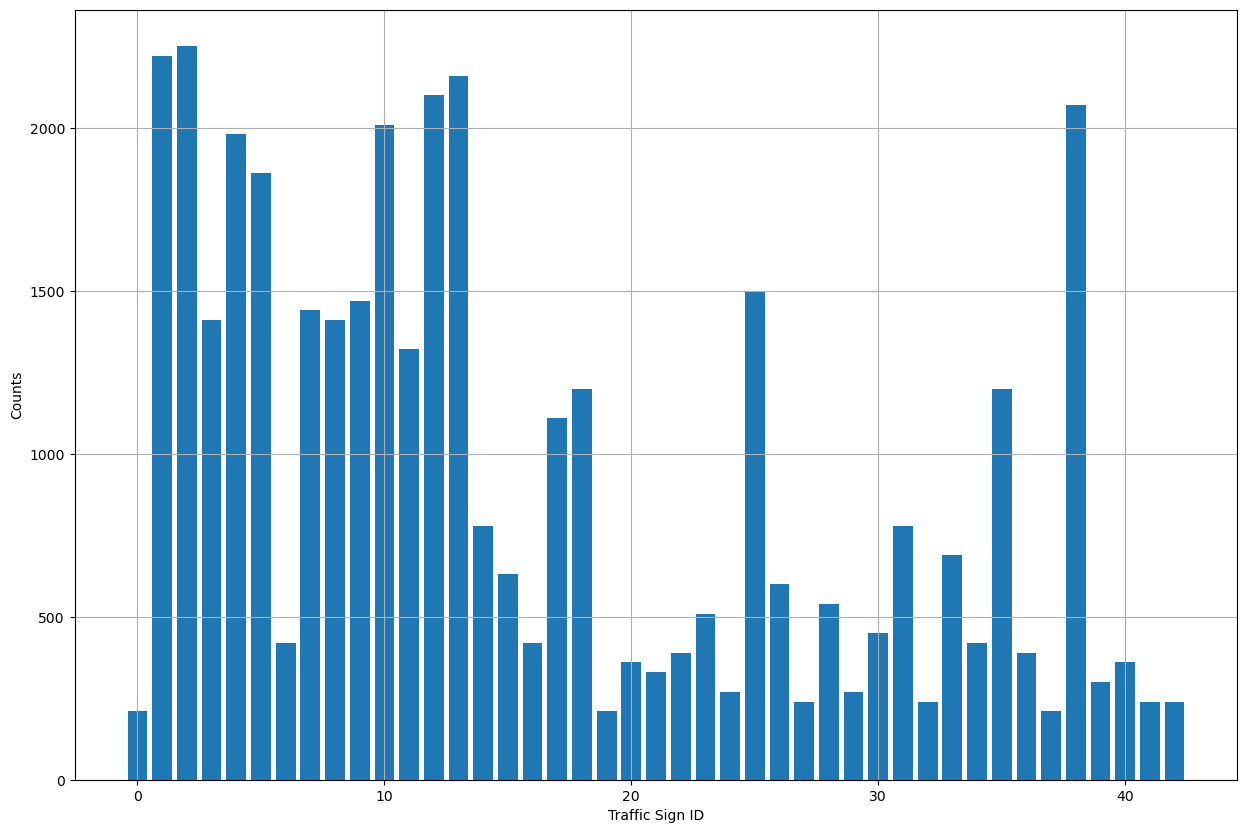

In [23]:
# Extract class identifiers
ids = data['ClassId']

# Compute the per class histogram
from collections import Counter
hist = Counter(ids)

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')
plt.show()

In [ ]:
# Questions: 
# Do you consider the dataset to be balanced? If so, why? If not, why?
# The dataset is not balanced because the number of images in different classes varies significantly. Some classes have many more images than others.

# Are there any classes that are (significantly) over-represented or under-represented?
# Yes, some classes are over-represented (have many images), and some are under-represented (have few images).

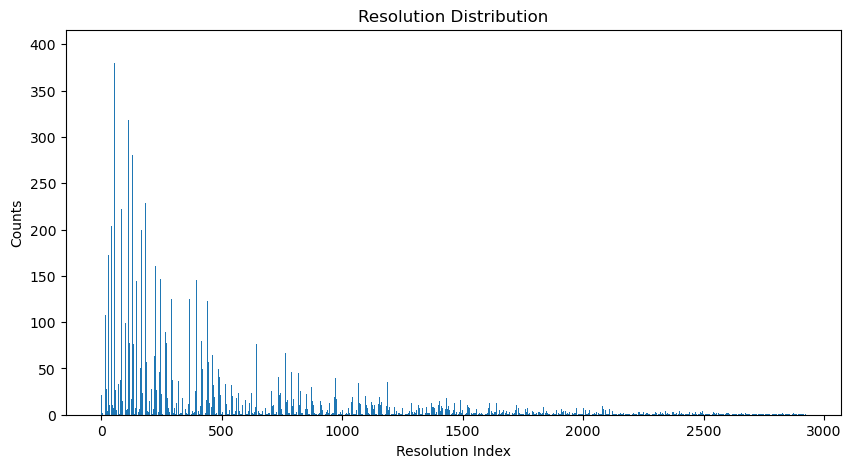

In [24]:
# Optional
# Perform a further analysis on the dataset and draw some conclusion from it.

# Извлечение разрешения изображений
resolutions = [cv2.imread(os.path.join(root, data.iloc[i]['Path'])).shape[:2] for i in range(num_samples)]
resolutions = np.array(resolutions)

# Распределение разрешений
unique_resolutions, counts = np.unique(resolutions, axis=0, return_counts=True)

plt.figure(figsize=(10, 5))
plt.bar(range(len(counts)), counts)
plt.xlabel('Resolution Index'), plt.ylabel('Counts')
plt.title('Resolution Distribution')
plt.show()